МФТИ ФИВТ: Курс Машинное Обучение (осень, 2016), Арсений Ашуха, ars.ashuha@gmail.com

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Hastie, The Elements of Statistical Learning, https://goo.gl/k3wfEU
    - 2.9 Model Selection and the Bias–Variance Tradeoff 
    - 15 Random Forests
- Соколов, Семинары по композиционным методам, https://goo.gl/sn8RyJ
- Andrew Ng, Bias vs. Variance, https://goo.gl/1ISZ6Y

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall <номер_группы> <фамилия>``, к примеру -- ``ML2016_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2016_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Какие формулы у шума, смещения, разброса? Какой смысл у этих компонент?

Пусть $y^*(x) = \mathbb{E}[y | x]$ -- оптимальный алгоритм, $\mu$ -- метод обучения, $\overline{y}(x) = \mathbb{E}_{X^l}[\mu\{X^l\}(x)]$ -- ответ, получаемый на $x$, при обучении усредненного алгоритма. Тогда
$$Noise = \mathbb{E}_{x, y}[(y - y^{*}(x))^2]$$
Шум в данных, вызванный случайной природой выборки
$$Bias = \mathbb{E}_{x, y}[(\overline{y}(x) - y^*(x))^2]$$
Квадрат смещения среднего алгоритма от оптимального
$$Variance = \mathbb{E}_{X^l, x, y}[(\mu\{X^l\}(x) - \overline{y}(x))^2]$$
Разброс семейства алгоритмов.

**Вопрос 2**: 4. Приведите пример семейства с маленьким смещением и большим разбросом. Приведите пример семейства с большим смещением и маленьким разбросом.

Decision tree имеет маленькое смещение, но большой разброс, так как при небольшом изменении данных дерево сильно изменится, и сложность разделяющей поверхности ничем не ограничена.

Линейные алгоритмы имеют большое смещение и маленький разброс, так как при небольшом изменении данных, гиперповерхность, разделяющая данные, повернется не сильно и линейные алгоритмы способны восстанавливать только линейные зависимости (если не добавлять признаки высших порядков).

**Вопрос 3**: Как сгенерировать подвыборку с помощью бутстрапа?

Равномерный сэмплинг их исходной выборки с повторениями

**Вопрос 4**: Что такое бэггинг?

Усреднение ответов базовых алгоритмов, обученных на разных подвыборках, полученных бустрапом.

**Вопрос 5**:  Как соотносятся смещение разброс композиции, построенной с помощью бэггинга, со смещением и разбросом одного базового алгоритма?

Смещение одинаковое, а разброс падает с увеличением колиечтсва деревьев и уменьшением корреляции между ними. 

**Вопрос 6**: Как обучается случайный лес? В чем отличия от обычной процедуры построения решающих деревьев?

Выбирается случайная подвыборка для обучения каждого дерева и иногда случайный набор признаков. В некоторых вариантах построения набор признаков изменяется от дерева к дереву, в других вариантах он изменяется от вершины к вершине одного и того же дерева.

**Вопрос 7**: Почему хорошими базовыми алгоритмами для бэггинга являются именно деревья?

Деревья имеют небольшое смещение, а их разброс падает с увеличением количества деревьев в лесе и уменьшением корреляций между ответами деревьев.

**Вопрос 8**: Как оценить качество случайного леса с помощью out-of-bag-процедуры?

Для каждого x ошибка считается и усредняется только на деревьях, которые не обучались на x, далее ошибка усредняется по всем x.

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center">Bagging</h1> 

Известно, что бэггинг плохо работает, если в качестве базовых классификаторов взять knn. Попробуем понять причины на простом примере.

Пусть дана выборка $X^l$ из $l$ объектов с ответами из множества $Y = \{−1, +1\}$. Будем рассматривать классификатор одного ближайшего соседа в качестве базового алгоритма. Построим с помощью бэггинга композицию длины $N$:

$$a_N(x) = sign(\sum_{n=1}^{N} b_n(x))$$

Оцените вероятность того, что ответ композиции на произвольном объекте x будет
отличаться от ответа одного классификатора ближайшего соседа, обученного по всей
выборке. Покажите, что эта вероятность стремится к нулю при N → ∞.

-----
Пусть $X_1^l, \dots, X_N^l$ -- случайные независимые выборки с повторением размера $l$ из $X^l$, на которых были обучены алгоритмы $b_1, \dots, b_N$.

Без ограничения общности пусть ответ 1NN обученного на всей выборке +1, а ответ композиции -1. Это значит, что ближайшая к $x$ точка из $X^l$ (пусть это будет точка $x_0$) имеет метку +1, а среди ответов базовых алгоритмов в композиции преобладает -1. В частности это означает, что хотя бы на половине из $X_1^l, \dots, X_N^l$ ближайшая к $x$ точка имеет метку -1. В частности это означает, что $x_0$ не попала хотя бы в половину из $X_1^l, \dots, X_N^l$. А вероятность такого события -- $(1 - 1/l)^{Nl/2} \rightarrow 0$. Кстати, последняя вероятность асимптотически равна $e^{-N/2}$ при большом $l$.

Итак, искомая вероятность не превышает $(1-1/l)^{lN/2} \rightarrow 0$

<h1 align="center">Bagging Implementation</h1> 

Реализуйте беггинг.

In [27]:
import warnings

import numpy as np
from copy import deepcopy
from sklearn.base import ClassifierMixin, BaseEstimator
from sklearn.utils import resample
from scipy.stats import mode
from collections import defaultdict

warnings.simplefilter("ignore")


class BaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator, n_estimators, items_rate=1.0, features_rate=1.0):
        """
        Parameters
        ----------
        base_estimator: sklearn.Classifier
            Базовый алгоритм, который можно обучить (есть метод fit).
            Для обучение композиции нужно много таких, можэно получить с помощю copy.deepcopy

        n_estimators: int
            Число алгоритмов в композиции

        items_rate: float > 0
            Доля объектов из трейна, на которой будет обучаться каждый базовый алгоритм

        features_rate: float > 0
            Доля фичей, на которой будет обучаться и применяться каждый базовый алгоритм
        """
        self.n_estimators = n_estimators
        self.items_rate = items_rate
        self.features_rate = features_rate
        self.base_estimator = base_estimator

    def fit(self, X, y):
        """
        Метод должен обучить композицию алгоритмов, используя X, y как обучающую выборку.
        Не забудте реализорвать функционал выбора случайных объектов и фичей.

        Parameters
        ----------
        X: 2d np.array
        y: 1d np.array
        """
        estimators = []
        for i in range(self.n_estimators):
            estimators.append(deepcopy(self.base_estimator))
        self.estimators = estimators
        
        self.features_idx = []
        num_objects = X.shape[0]
        num_features = X.shape[1]
        num_objects_to_sample = (int)(self.items_rate * num_objects)
        num_features_to_sample = (int)(self.features_rate * num_features)
        num_objects_to_sample = max(num_objects_to_sample, 1)
        num_features_to_sample = max(num_features_to_sample, 1)

        for estimator in self.estimators:
            X_b, y_b = resample(X, y, n_samples=num_objects_to_sample)
            feature_indices, X_b = resample(np.arange(num_features), X_b.T, n_samples=num_features_to_sample, replace=False)
            X_b = X_b.T
            self.features_idx.append(feature_indices)
            estimator.fit(X_b, y_b)
        return self

    def predict(self, X):
        """

        Parameters
        ----------
        X: 2d np.array матрица объекты признаки на которых нужно сказать ответ

        Returns
        -------
        y_pred: 1d np.array, Вектор классов для каждого объекта
        """
        
        probs = []
        
        for est, feats in zip(self.estimators, self.features_idx):
            probs.append(est.predict(X.T[feats].T))
        probs = np.array(probs)
        return mode(probs)[0][0]
    
    
    @property
    def feature_importances(self):
        feat_importances = defaultdict(list)
        for estimator, feats in zip(self.estimators, self.features_idx):
            for feat, importance in zip(feats, estimator.feature_importances_):
                feat_importances[feat].append(importance)
        feat_importances = {k: np.mean(np.array(v)) for (k, v) in feat_importances.iteritems()}
        return feat_importances

### Titanic Test

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

titanic = pd.read_csv('./data/train.csv')[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

sex_encoder = LabelEncoder()
titanic.Sex = sex_encoder.fit_transform(titanic.Sex)
features = ['Pclass', 'Sex', 'Age', 'Fare']

In [4]:
X, y = titanic[features].values, titanic.Survived.values
X = np.nan_to_num(X)
X_train, y_train, X_test, y_test = X[:500], y[:500], X[500:], y[500:]
print(X.shape)

(891, 4)


Нужно обучить свой беггинг на датасете титаник, и посмотреть работает ли он. 

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
# =======================================
# Обучите беггинг над DecisionTreeClassifier с 10 моделями
# =======================================
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)
%time clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)


CPU times: user 10.9 ms, sys: 3.31 ms, total: 14.2 ms
Wall time: 11.2 ms
0.968 0.795396419437


Проведите эксперименты:
    - Работает-ли беггинг лучше чем просто линейная модель?
    - Какой items_rate и features_rate работает лучше и почему?

Проведем сначала второй эксперимент с помощью GridSearchCV

In [266]:
from sklearn.grid_search import GridSearchCV

clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1)
params = {
    "features_rate": np.linspace(0.25, 1, 4),
    "items_rate": np.linspace(0.1, 1, 10),
    "n_estimators": np.arange(10, 150, 10)
}
gscv = GridSearchCV(clf, params, n_jobs=4, cv=5)
gscv.fit(X, y)
gscv.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         features_rate=0.75, items_rate=0.5, n_estimators=80)

In [267]:
gscv.best_score_

0.82940516273849607

Как видим лучшие параметры n_estimators=80, items_rate=0.5, features_rate=0.75.

Понятно, что items_rate=1.0 и features_rate=1.0 нам не подходят, так как мы хотим маленькую корреляцию между ответами алгоритмов

In [281]:
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, features_rate=0.75, items_rate=0.5)
clf.fit(X_train, y_train)
acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
print(acc)

(0.92400000000000004, 0.8132992327365729)


In [282]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
print(acc)

(0.80000000000000004, 0.76982097186700771)


Бэггинг работает лучше, чем линейнеая модель.

### Adult Test

In [7]:
adult = pd.read_csv(
    './data/adult.data', 
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"], 
    header=None, na_values="?")

adult = pd.get_dummies(adult)
adult["Target"] = adult["Target_ >50K"]
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
X_train, y_train, X_test, y_test = X[:20000], y[:20000], X[20000:], y[20000:]
print(X.shape)

(32561, 108)


Ответте на вопросы:
    - Работает-ли беггинг лучше чем просто линейная модель?
    - Какой items_rate и features_rate работает лучше и почему?

Аналогично, находим наилучшие параметры с помощью GridSearchCV

In [290]:
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1)
params = {
    "features_rate": np.linspace(0.1, 1, 5),
    "items_rate": np.linspace(0.1, 1, 5),
    "n_estimators": [30, 60, 100, 120]
}
gscv = GridSearchCV(clf, params, n_jobs=4, cv=3)
gscv.fit(X, y)
print(gscv.best_estimator_)
print(gscv.best_score_)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         features_rate=0.55000000000000004, items_rate=0.55000000000000004,
         n_estimators=100)
0.864101225392


Как видим лучшие параметры n_estimators=100, items_rate=0.55, features_rate=0.55.

Понятно, что items_rate=1.0 и features_rate=1.0 нам не подходят, так как мы хотим маленькую корреляцию между ответами алгоритмов

In [291]:
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, features_rate=0.55, items_rate=0.55)
clf.fit(X_train, y_train)
acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
print(acc)

(0.94059999999999999, 0.86147599713398615)


In [288]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
acc = accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)
print(acc)

(0.80120000000000002, 0.79635379348777968)


Видим, что бэггинг работает лучше, чем линейная модель

<h1 align="center">Text, Image Classification</h1> 

Дальше в каждом эксперименте нужно: 
- сравниться с линейной моделью ( какую лучше выбрать?=) )
- сделать выбор в пользу одной из моделей
- выбор обосновать, почему одна из моделей хуже а другая лучше
- что такое хуже и лучше
- попробуйте беггинг над деревьями и линейными моделями 
- почему работает или не работает, какие особенности данных на это влияют

### Text classification

In [319]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [320]:
vectorizer = TfidfVectorizer()
X_train, y_train = vectorizer.fit_transform(newsgroups_train.data), newsgroups_train.target
X_test,  y_test  = vectorizer.transform(newsgroups_test.data), newsgroups_test.target

In [321]:
X_train.shape

(11314, 130107)

Сначала попробуем RidgeClassifier

In [322]:
%%time
from sklearn.linear_model import RidgeClassifier, LogisticRegression

clf = RidgeClassifier()
clf.fit(X_train, y_train)

print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.996906487538 0.853425385024
CPU times: user 13.1 s, sys: 232 ms, total: 13.3 s
Wall time: 13.8 s


Теперь LogisticRegression

In [323]:
%%time
from sklearn.linear_model import RidgeClassifier, LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.969860350009 0.827934147637
CPU times: user 19 s, sys: 446 ms, total: 19.4 s
Wall time: 10.8 s


Наконец SGDClassifier

In [325]:
%%time
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log')
clf.fit(X_train, y_train)

print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.966855223617 0.824349442379
CPU times: user 2.38 s, sys: 64.9 ms, total: 2.44 s
Wall time: 1.45 s


Лучшие результаты показывает RidgeClassifier, его и будем использовать

In [301]:
%%time

clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, features_rate=0.5, items_rate=0.5)
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.997260031819 0.7290228359
CPU times: user 9min 10s, sys: 7.3 s, total: 9min 17s
Wall time: 9min 53s


Как видим, с данными параметрами BaggingClassifier над DecisionTreeClassifier работает не очень хорошо. Не смотря на то, что у обоих моделей (линейной и бэггинга над деревьями) практически одинаковая ошибка на трейне, ошибка на тесте у BaggingClassifier сильно больше.

Это объясняется тем, что фичей для BaggingClassifier слишком много. Даже при features_rate=0.5, фичей получается больше 50000, а объектов для тренировки -- всего 10000.

Также заметим, что процесс занял 10 минут и если мы хотим поподбирать параметры, нам придется уменьшить количество фичей. Оставим 10000 самых часто встречаемых слов.

In [312]:
vectorizer = TfidfVectorizer(max_features=10000)
X_train, y_train = vectorizer.fit_transform(newsgroups_train.data), newsgroups_train.target
X_test,  y_test  = vectorizer.transform(newsgroups_test.data), newsgroups_test.target

In [313]:
X_train.shape

(11314, 10000)

In [314]:
%%time
clf = RidgeClassifier()
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.989923987979 0.824083908656
CPU times: user 6.26 s, sys: 100 ms, total: 6.36 s
Wall time: 6.74 s


In [317]:
%%time
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, features_rate=0.5, items_rate=0.5)
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.996818101467 0.732342007435
CPU times: user 5min 19s, sys: 8.15 s, total: 5min 27s
Wall time: 8min 46s


In [318]:
X_train.shape

(11314, 10000)

От того, что мы оставили меньше 10% фичей качетсов линейной модели упало всего на 3%. 

Интерестные вещи происходят с BaggingClassifier. Качество поднялось на 0.5%. Cкорость обучения увеличилась всего в два раза, в то время как количество фичей упало в 10 раз, время обучения должно было упасть пропорционально. Возможно DecisionTreeClassifier при большом количестве фичей перебирает не все. Также возможно, что большую часть времени заняло выделение и копирования bootstrap подвыборок для базовых алгоритмов.

Попробуем уменьшить features_rate, а items_rate увеличить

In [326]:
%%time
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, features_rate=0.1, items_rate=1.0)
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.99991161393 0.721720658524
CPU times: user 2min 22s, sys: 2.69 s, total: 2min 25s
Wall time: 2min 36s


Качетсво сильно не изменилось, зато время обучения теперь всего 2 минуты! Думаю, что просранство для улучшения BaggingClassifier есть, в частности features_rate=0.1 намекает на то, что n_estimators должен быть большим, хотя бы 1000-2000. Но это уже требует параллельной реализации BaggingClassifier что за рамками этого ДЗ.

Напоследок попробуем BaggingClassifier над RidgeClassifier

In [316]:
%%time
clf = BaggingClassifier(RidgeClassifier(), n_estimators=10)
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.984178893406 0.821030270844
CPU times: user 59.7 s, sys: 885 ms, total: 1min
Wall time: 1min 2s


Бэггинг над линейной модели не дал никакого результата, что и логично, ведь у линейных моделей итак низкий разброс.

Итак, вывод: для классификации текста лучше всего подходит линейные модели -- они просты в обучении и быстры, поддерживают онлайн обучение и в рамках предположения Bag of words работают лучше всего

### Image classification

In [1]:
from utils import load_cifar10
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10('./data/cifar10')[0]

In [2]:
X_train, X_test = X_train.reshape(X_train.shape[0], -1), X_test.reshape(X_test.shape[0], -1)

In [9]:
X_train.shape

(50000, 3072)

Сначала проверим, сбалансированы ли классы.

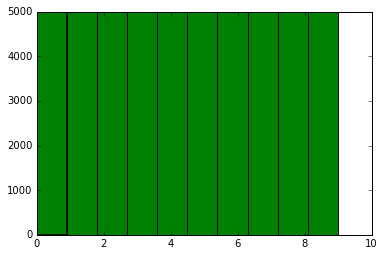

In [16]:
import matplotlib.pyplot as plt
plt.hist(y_train)
plt.show()

Сначала я воспользовался SGDClassifier, но качество на тесте на нем получилось 17%, видимо, гардиентный спуск не обучился. Потом я решил использовать L-BFGS в LogisticRegression в качетсве представителя линейных моделей

Классы сбалансированы, можно продолжать

In [8]:
%%time
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', class_weight="balanced", solver="lbfgs", n_jobs=4)
clf.fit(X_train, y_train)

print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.46048 0.3996
CPU times: user 3.15 s, sys: 3.13 s, total: 6.27 s
Wall time: 54.6 s


Видим, что датасет большой. Попробуем сначала обучить хотя бы один DecisionTreeClassifier и замерить время

In [18]:
%%time
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1, features_rate=1.0, items_rate=1.0)
clf.fit(X_train, y_train)

print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.72638 0.2501
CPU times: user 2min 53s, sys: 9.08 s, total: 3min 2s
Wall time: 3min 9s


Итак, обучение занимает 3 минуты. Учитывая, что n_esimators должно быть порядка 100, надо попробовать уменьшить время, отводимое на обучение.

In [19]:
%%time
clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt"), n_estimators=1, features_rate=1.0, items_rate=1.0)
clf.fit(X_train, y_train)

print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.72292 0.2459
CPU times: user 10.2 s, sys: 7.21 s, total: 17.4 s
Wall time: 20.4 s


Уже лучше. Теперь запустим обучение на 10 базовых алгоритмах.

In [22]:
%%time
clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt"), n_estimators=10, features_rate=1.0, items_rate=1.0)
clf.fit(X_train, y_train)

print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.99316 0.3621
CPU times: user 1min 44s, sys: 59.4 s, total: 2min 43s
Wall time: 3min 20s


Попробуем версию из sklearn, она же параллельная.

In [24]:
from sklearn.ensemble import BaggingClassifier as BaggingClassifier_sklearn

In [25]:
%%time
clf = BaggingClassifier_sklearn(DecisionTreeClassifier(max_features="sqrt"), n_estimators=10, n_jobs=4)
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.9938 0.358
CPU times: user 19.6 s, sys: 8.61 s, total: 28.2 s
Wall time: 5min


Странно, получилось медленнее (по wall time)

Запустим на 30 базовых алгоритмах

In [26]:
%%time
clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt"), n_estimators=30, features_rate=1.0, items_rate=1.0)
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

0.99992 0.4229
CPU times: user 5min, sys: 2min 2s, total: 7min 3s
Wall time: 7min 50s


Мы смогли обогнать линейную модель на тесте. 

Время почему-то увеличивается не пропорционально количеству деревьев. Попробуем 50 базовых алгоритмов.

In [27]:
%%time
clf = BaggingClassifier(DecisionTreeClassifier(max_features="sqrt"), n_estimators=50, features_rate=1.0, items_rate=1.0)
clf.fit(X_train, y_train)
print accuracy_score(clf.predict(X_train), y_train), accuracy_score(clf.predict(X_test), y_test)

1.0 0.4507
CPU times: user 8min 27s, sys: 3min 25s, total: 11min 52s
Wall time: 13min 4s


Итак, мы смогли улучшить результат линейной модели на 5% с помощью бэггинга над решающими деревьями. По сравнению с предидущей задачей, здесь гораздо меньше фичей, следовательно, нужно сильно меньше базовых алгоритмов, чтобы хоть как-то уменьшить разброс, а именно уменьшение разброса делает бэггинг таким эффективным

<h1 align="center">Random Forest Feature Impotance</h1> 

Опишите как вычисляется важность фичей в дереве, можите изучить как работает  feature\_importances_ в sklearn.

---

Для данного признака считается нормализованное уменьшение критреия джини, вызванное всеми вершинами, в которой происходило разбиение по этому признаку 

Почитайте Feature Impotance для Adult и Titanic (используйте полный датасет), ПРОИНТЕРПРЕТИРУЙТЕ резульататы.

### Adult

In [38]:
X, y = adult[adult.columns[:-3]].values, adult[adult.columns[-1]].values
X_train, y_train, X_test, y_test = X[:20000], y[:20000], X[20000:], y[20000:]

In [39]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                        items_rate=1, features_rate=1).fit(X_train, y_train)

In [40]:
clf.feature_importances

{0: 0.11378498603517966,
 1: 0.16762776936826299,
 2: 0.11044508979167243,
 3: 0.10356352821759308,
 4: 0.038649427363131018,
 5: 0.064629658109361235,
 6: 0.001568665206948349,
 7: 0.0052798590513474805,
 8: 0.0062047888287784583,
 9: 0.0,
 10: 0.0098733896499170141,
 11: 0.0065685270210114584,
 12: 0.0092348569031112989,
 13: 0.0043567023701978338,
 14: 0.0,
 15: 0.00068313296087743136,
 16: 0.000613657969579491,
 17: 0.0004701312134365159,
 18: 0.00010088421629927685,
 19: 0.00014267735430785274,
 20: 0.00048472157594416017,
 21: 0.00047029838904998728,
 22: 0.001350822642194651,
 23: 0.0026028699925275504,
 24: 0.0026649890696578936,
 25: 0.00071548227056130462,
 26: 0.0033497140952469455,
 27: 0.002675876894981576,
 28: 0.00010150812051733752,
 29: 0.0013057681690004464,
 30: 0.0040831102782392659,
 31: 0.0021306073921483811,
 32: 0.00040772721821852336,
 33: 0.19590384945851508,
 34: 0.00064980530000458903,
 35: 0.0018445752079852067,
 36: 0.001122566906624322,
 37: 0.00111508374

Самыми важными оказались 1 и 33 фича. Попробуем получить список фичей с feature_importance > 0.1

In [55]:
important_keys = [k for (k, v) in clf.feature_importances.iteritems() if v > 0.1]

In [56]:
adult.columns[important_keys]

Index([u'Age', u'fnlwgt', u'Education-Num', u'Capital Gain',
       u'Martial Status_ Married-civ-spouse'],
      dtype='object')

В числе важных признаков -- образование, возраст, прирост капитала, семейное положение, что вполне логично

### Titanic

In [28]:
X, y = titanic[features].values, titanic.Survived.values
X = np.nan_to_num(X)
X_train, y_train, X_test, y_test = X[:500], y[:500], X[500:], y[500:]

In [29]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, 
                        items_rate=1, features_rate=1).fit(X_train, y_train)

In [31]:
clf.feature_importances

{0: 0.082254086833973103,
 1: 0.33836958715051202,
 2: 0.24692036365376172,
 3: 0.33245596236175301}

Как видим, самыми важными оказались фичи Sex и Fare. Видимо, мужчины выживали чаще, а от fare зависил денежный статус